# KNN - (K-Nearest-Neigbors)


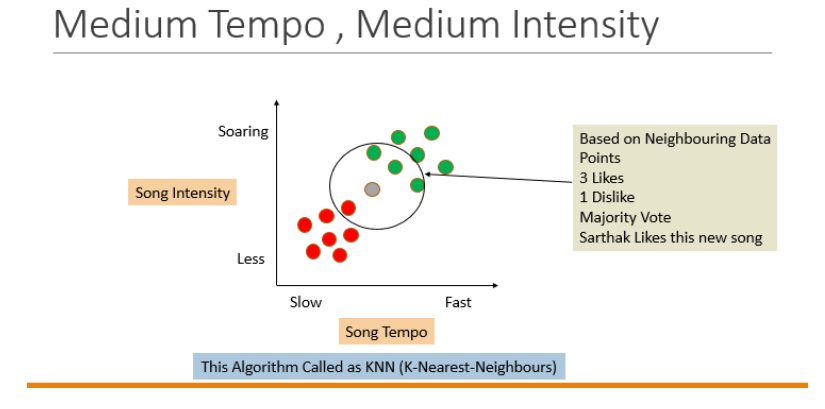

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 : Read the train dataset

In [2]:
import pandas as pd 
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

1

# Step 3 : Seperate X and Y (specices)

In [7]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [8]:

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Step 4 : Perform Preprocessing on X

In [10]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:

X_pre = num_pipe.fit_transform(X)

In [14]:

X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# 
Apply train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [16]:
xtrain.shape

(100, 4)

In [17]:
xtest.shape

(50, 4)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [19]:

ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [20]:

xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [21]:

ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor



# Step 6: Create the model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=33)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=33)

In [23]:
model1.score(xtrain, ytrain)

0.87

In [24]:

model1.score(xtest, ytest)

0.9

# 
Hyperparameter tuning

In [25]:

params = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [26]:

from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv1 = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [27]:
gscv1.best_params_

{'n_neighbors': 3}

In [28]:

gscv1.best_score_

0.9319552669552669

In [29]:
best_knn = gscv1.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [30]:

best_knn.score(xtrain, ytrain)

0.95

In [31]:

best_knn.score(xtest, ytest)

0.98